In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
from scipy.io import loadmat
cluster_fn = os.path.join('/user_data/mmhender/toolboxes/SketchTokens/', 'clusters.mat')
clust = loadmat(cluster_fn)
feature_ims = clust['clusters']['clusters'][0][0]
feature_ims = np.moveaxis(feature_ims, [0,1,2], [1,0,2])

In [8]:
# Load the saved results of the analysis
dfname = '/user_data/mmhender/features/sketch_tokens/Sketch_tokens_info_table.csv'
df = pd.read_csv(dfname)

estim_bend_values = np.array(df['best_bend'])
estim_orient_values = np.array(df['best_orient']*180/np.pi)
best_linear_index = np.array(df['best_linear_index'])
best_curv_index = np.array(df['best_curv_index'])
which_best = np.array(df['which_best'])

is_single = df['single']
is_junction = df['junction']
is_double = df['double']
is_other = df['other']

In [10]:
df

,best_freq,best_scale,best_bend,best_orient,best_linear_index,best_curv_index,which_best,double,junction,single,other
0,2.0,0.418879,0.000000,6.195919,71,35,0,False,False,True,False
1,2.0,0.418879,0.000000,1.570796,18,18,0,False,False,True,False
2,2.0,0.418879,0.000000,0.261799,3,39,0,False,False,True,False
3,2.0,0.418879,0.000000,0.087266,1,1,0,False,False,True,False
4,2.0,0.418879,0.000000,1.221730,14,14,0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
145,2.0,0.418879,0.000000,1.570796,18,54,0,False,True,False,False
146,2.0,0.418879,0.000000,0.087266,1,108,0,False,True,False,False
147,2.0,0.418879,0.085714,6.108652,34,142,1,False,False,True,False
148,2.0,0.418879,0.000000,3.141593,36,36,0,False,False,True,False


In [4]:
from analyze_features import bent_gabor_bank

freq_values_cyc_per_image = np.linspace(2,7,4)
bend_values = np.linspace(0, 0.30, 8)
orient_values = np.linspace(0,2*np.pi,73)[0:72]
cropped_size = 30;
bank = bent_gabor_bank.bent_gabor_feature_bank(freq_values = freq_values_cyc_per_image, \
                                       bend_values = bend_values, \
                                       orient_values = orient_values, \
                                       image_size=cropped_size, \
                                       device = 'cpu:0')
linear_kernels = bank.kernels['lin_space']
curv_kernels = bank.kernels['curv_space']
rect_kernels = bank.kernels['rect_space']

initialized feature bank, device is: cpu:0
freq values
[2.         3.66666667 5.33333333 7.        ]
scale values
[7.81378119 6.06484296 4.98370619 4.19907135]
bend values
[0.         0.04285714 0.08571429 0.12857143 0.17142857 0.21428571
 0.25714286 0.3       ]
orient values
[0.         0.08726646 0.17453293 0.26179939 0.34906585 0.43633231
 0.52359878 0.61086524 0.6981317  0.78539816 0.87266463 0.95993109
 1.04719755 1.13446401 1.22173048 1.30899694 1.3962634  1.48352986
 1.57079633 1.65806279 1.74532925 1.83259571 1.91986218 2.00712864
 2.0943951  2.18166156 2.26892803 2.35619449 2.44346095 2.53072742
 2.61799388 2.70526034 2.7925268  2.87979327 2.96705973 3.05432619
 3.14159265 3.22885912 3.31612558 3.40339204 3.4906585  3.57792497
 3.66519143 3.75245789 3.83972435 3.92699082 4.01425728 4.10152374
 4.1887902  4.27605667 4.36332313 4.45058959 4.53785606 4.62512252
 4.71238898 4.79965544 4.88692191 4.97418837 5.06145483 5.14872129
 5.23598776 5.32325422 5.41052068 5.49778714 5.585053

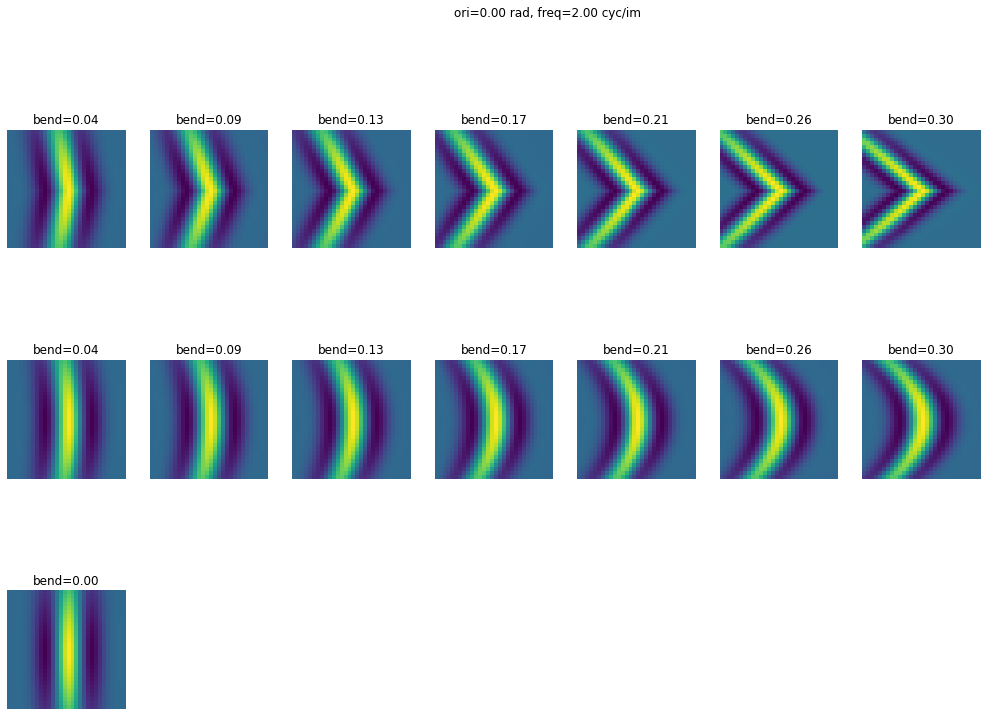

In [6]:
bank.plot_kernel_bends(ori_ind=0)

Text(0.5, 0.98, 'straight line features')

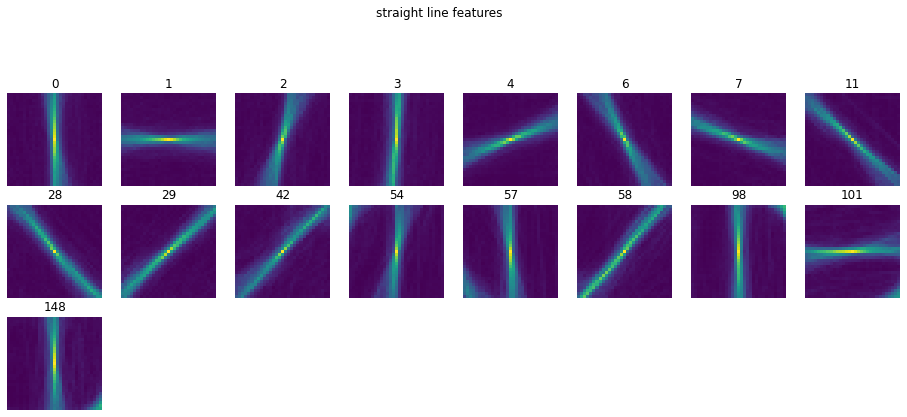

In [5]:
# Plot images, separated by their groupings
ims2plot = np.where(is_single & (estim_bend_values==0))[0]

plt.figure(figsize=(16,12));
for ii, im in enumerate(ims2plot):
    plt.subplot(6,8,ii+1)
    plt.pcolormesh(feature_ims[:,:,im])
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.title('%d'%im)
    
plt.suptitle('straight line features')

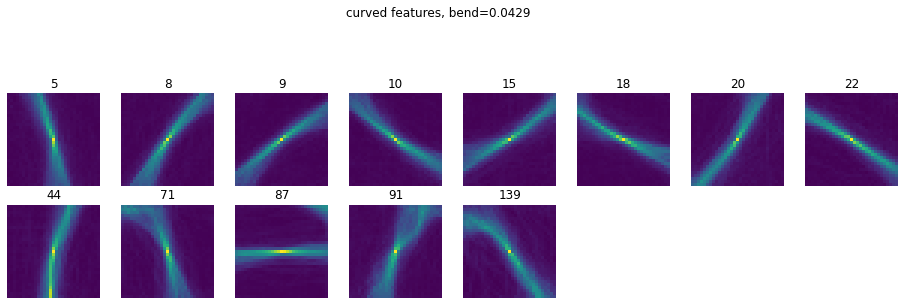

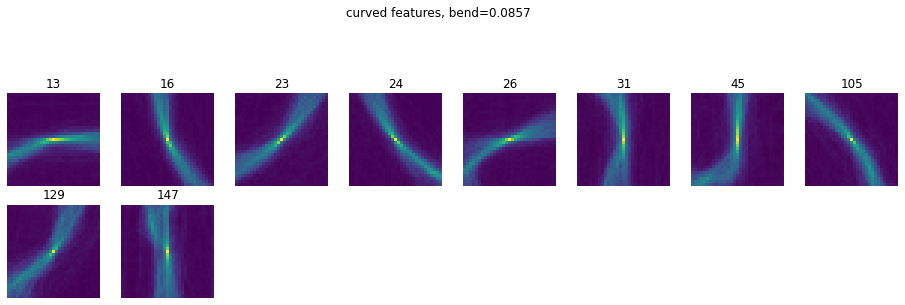

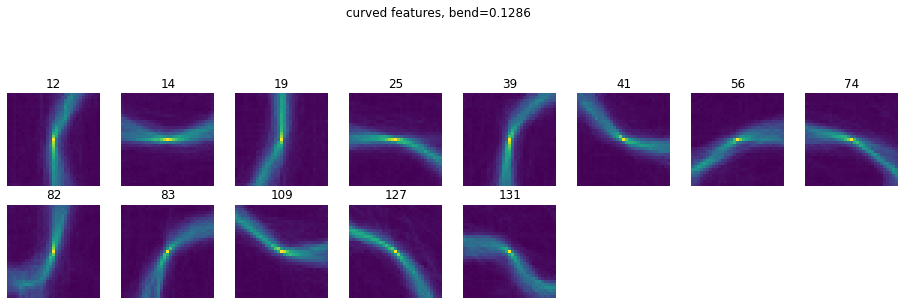

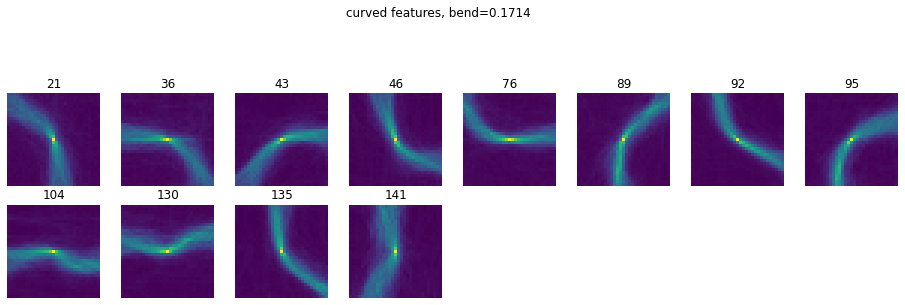

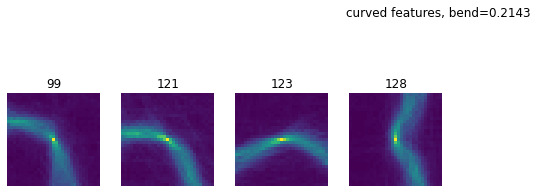

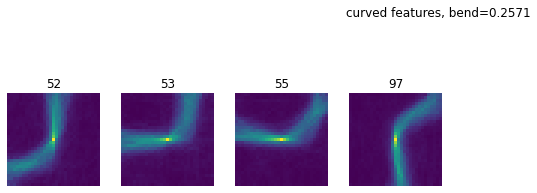

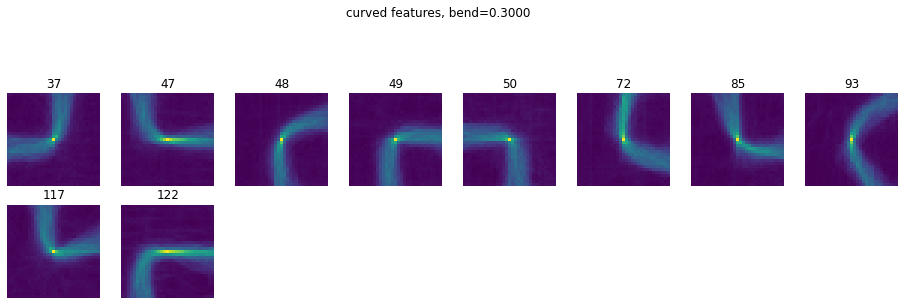

In [6]:
# Plot images, separated by their groupings
unbends = np.unique(estim_bend_values)[1:]
ims2plot_list = [np.where(is_single & (estim_bend_values==bb))[0] for bb in unbends]

for bb, ims2plot in enumerate(ims2plot_list):

    plt.figure(figsize=(16,12));
    for ii, im in enumerate(ims2plot):
        plt.subplot(6,8,ii+1)
        plt.pcolormesh(feature_ims[:,:,im])
        plt.axis('square')
        plt.gca().invert_yaxis()
        plt.axis('off')        
        plt.title('%d'%im)

    plt.suptitle('curved features, bend=%.4f'%unbends[bb])

Text(0.5, 0.98, 'parallel line type features')

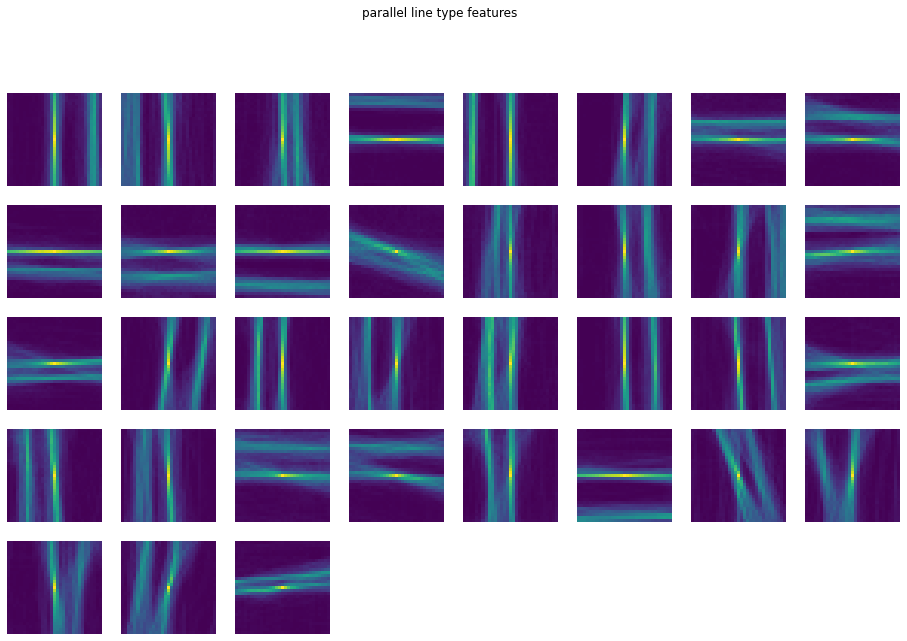

In [7]:
# Plot images, separated by their groupings
ims2plot = np.where(is_double)[0]

plt.figure(figsize=(16,12));
for ii, im in enumerate(ims2plot):
    plt.subplot(6,8,ii+1)
    plt.pcolormesh(feature_ims[:,:,im])
    plt.gca().invert_yaxis()
    plt.axis('off')
    
plt.suptitle('parallel line type features')

Text(0.5, 0.98, 'junction type features')

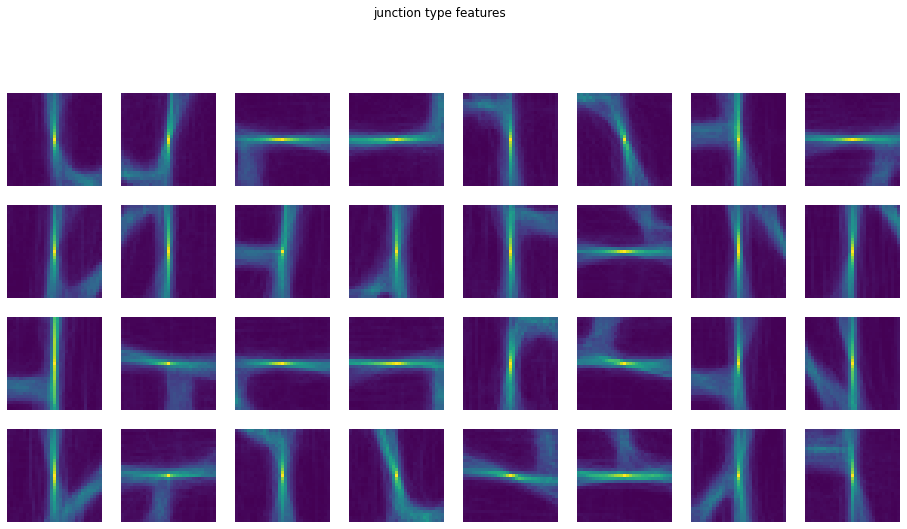

In [10]:
# Plot images, separated by their groupings
ims2plot = np.where(is_junction)[0]

plt.figure(figsize=(16,12));
for ii, im in enumerate(ims2plot):
    plt.subplot(6,8,ii+1)
    plt.pcolormesh(feature_ims[:,:,im])
    plt.gca().invert_yaxis()
    plt.axis('off')
    
plt.suptitle('junction type features')

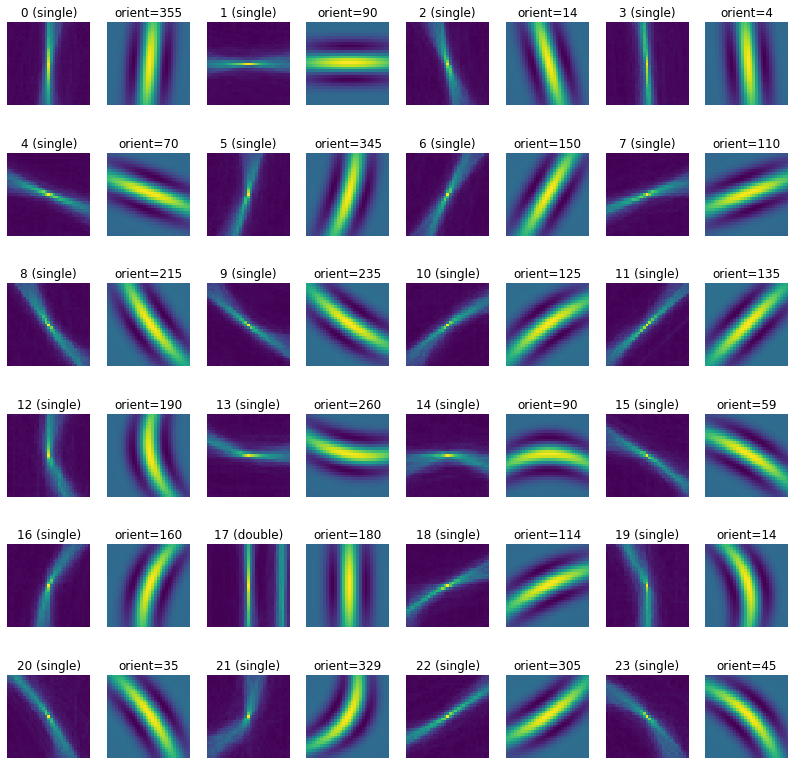

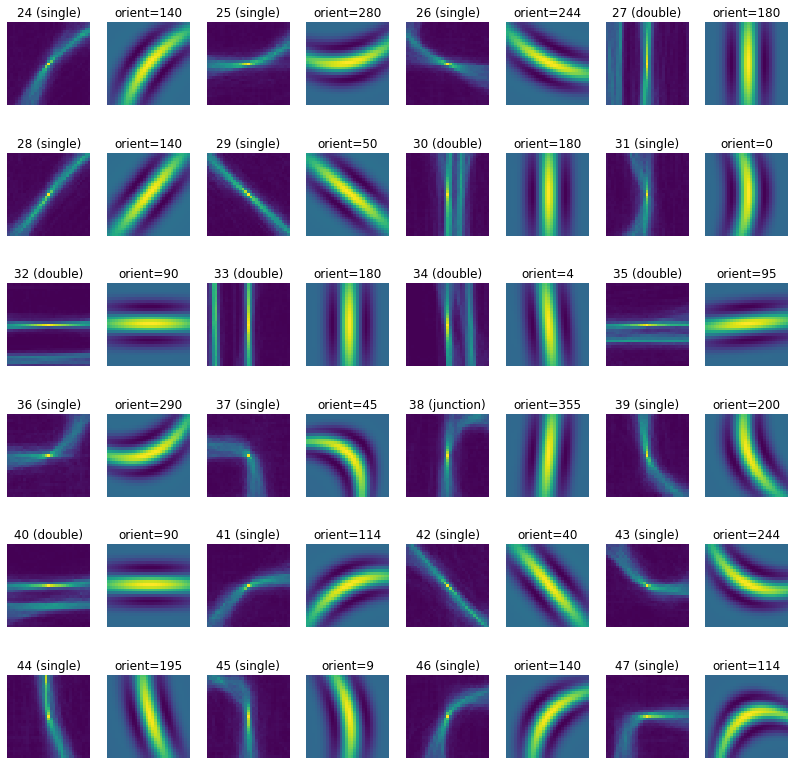

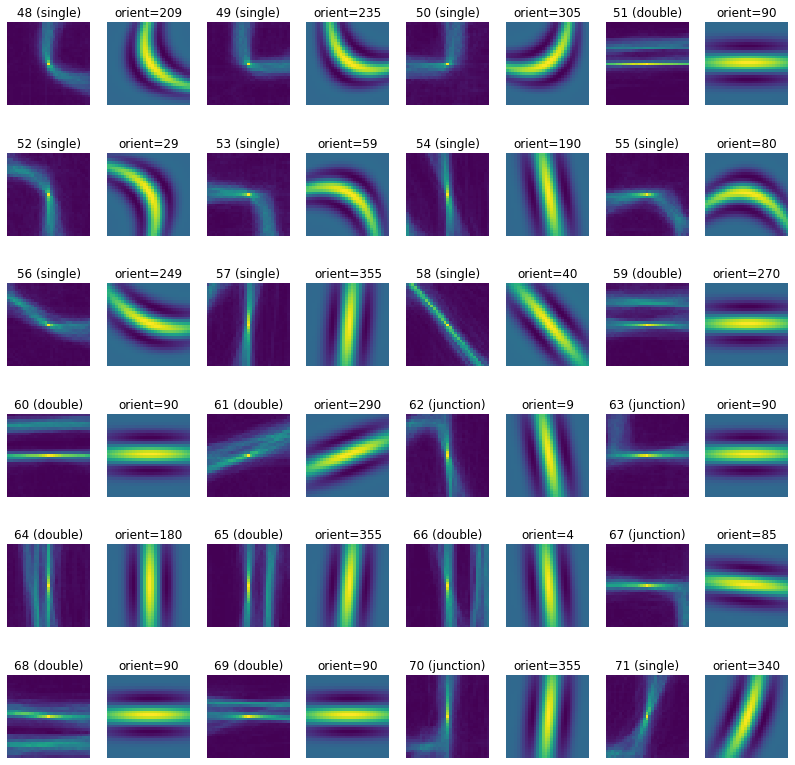

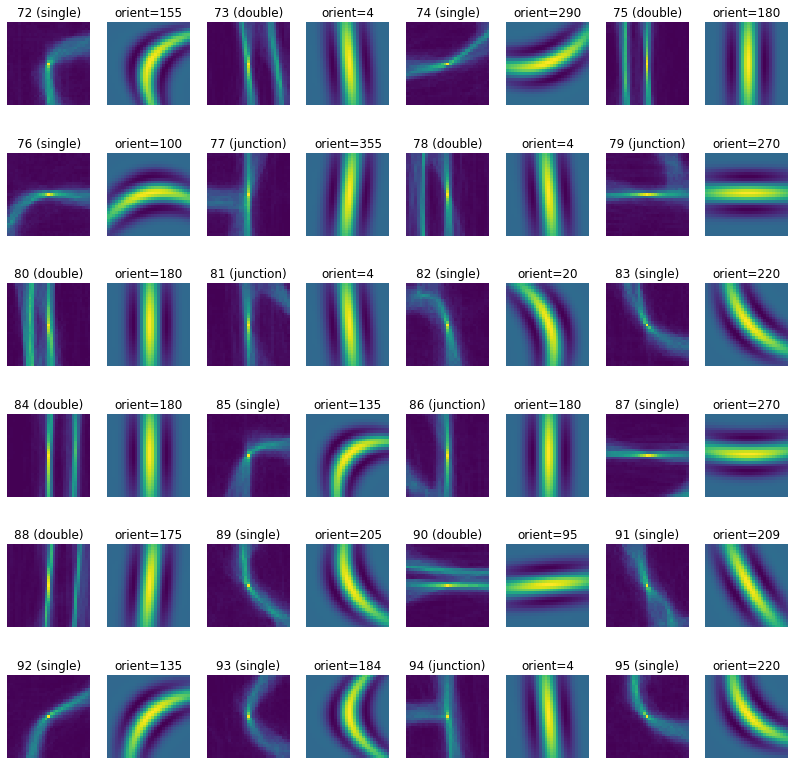

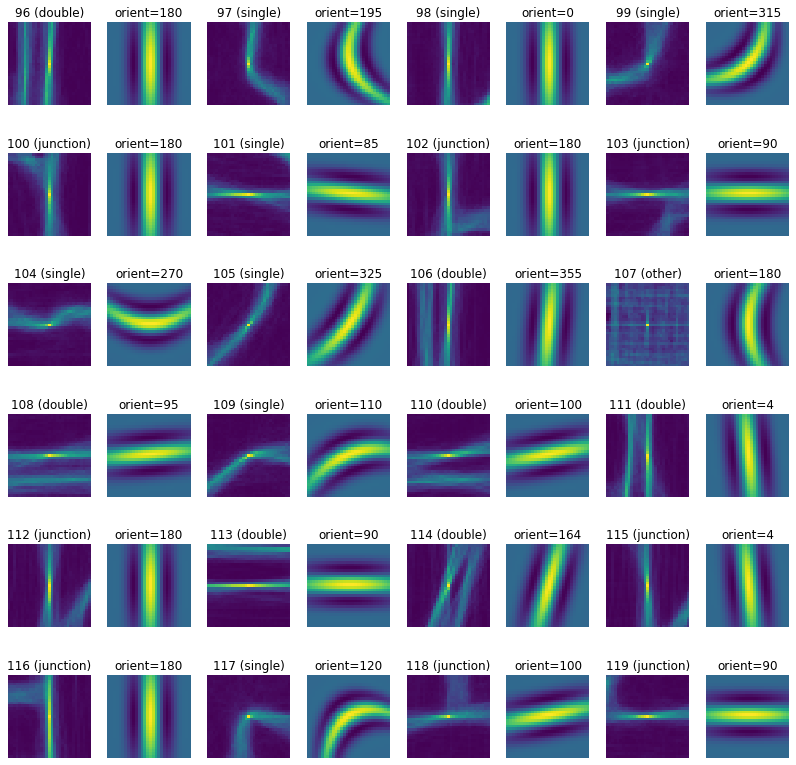

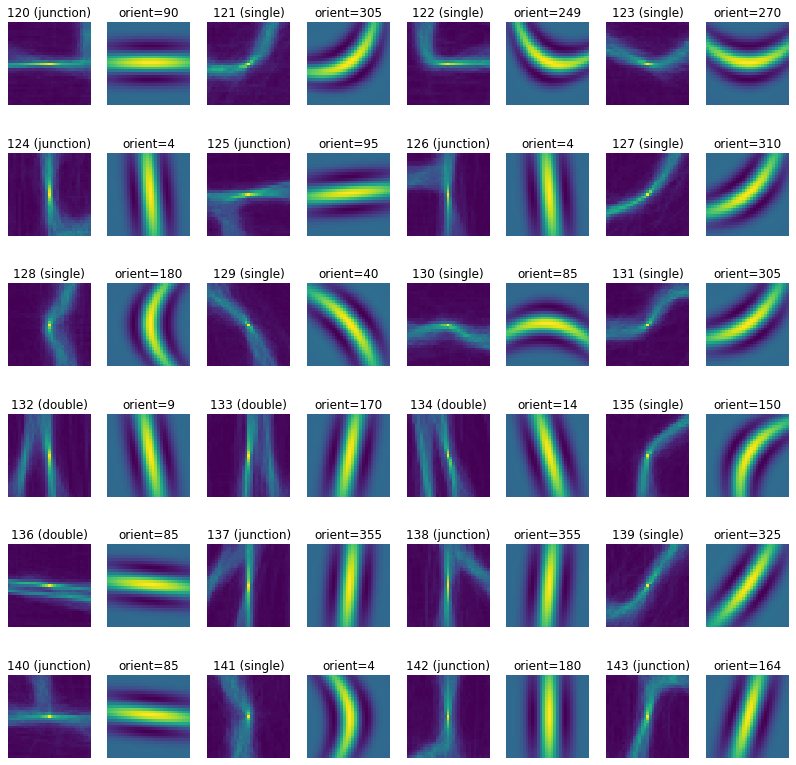

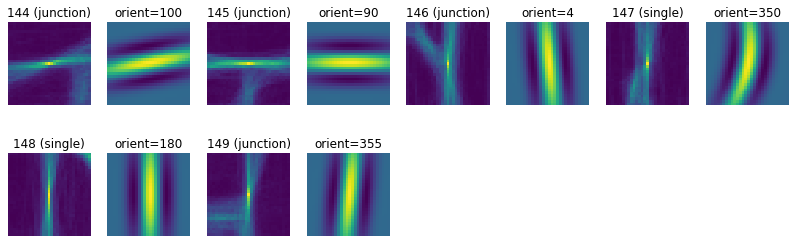

In [9]:
# Plot each image alongside its best linear or curved kernel
# makes many plots
# works best for the "single line" features

nperplot = 24;
nplots = int(np.ceil(150/nperplot))
ims2plot_list = [np.arange(ii*nperplot, np.min([nperplot*(ii+1), 150])) for ii in range(nplots)]

for ims2plot in ims2plot_list:

    plt.figure(figsize=(14,14));
    pi=0
    for ii in ims2plot:

        pi+=1
        plt.subplot(6,8,pi)
        plt.pcolormesh(feature_ims[:,:,ii])
        plt.axis('off')
        plt.axis('square')
        if is_junction[ii]:
            type_str = 'junction'
        elif is_double[ii]: 
            type_str = 'double'
        elif is_single[ii]:
            type_str = 'single'
        else:
            type_str = 'other'
        plt.title('%d (%s)'%(ii, type_str))

        pi+=1
        plt.subplot(6,8,pi)
        if which_best[ii]==1:
            plt.pcolormesh(curv_kernels[best_curv_index[ii]])
        elif which_best[ii]==0:
            plt.pcolormesh(linear_kernels[best_linear_index[ii]])
        plt.axis('off')
        plt.axis('square')
        plt.title('orient=%d'%estim_orient_values[ii])
